# 2

---> GridSearchCV 사용해서 알고리즘 비교

'1 데이터 불러오기' ~ '4 독립변수 재지정'까지 1번 파일이랑 똑같은 과정

* 1. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/school/data.csv")
df.head(5)

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


-> label 컬럼 : total_score를 평균값 기준으로 0/1로 표시한 것.

* 2. 컬럼 분류

In [3]:
train_cols = df.columns[0:8]
X = df[train_cols]
y = df['Label']
print(train_cols)

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')


In [4]:
df['Label'].value_counts()

0    2158
1     445
Name: Label, dtype: int64

-> 종속변수가 불균형 데이터이므로, 언더샘플링 필요.

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류/n (0: bad, 1:good)')

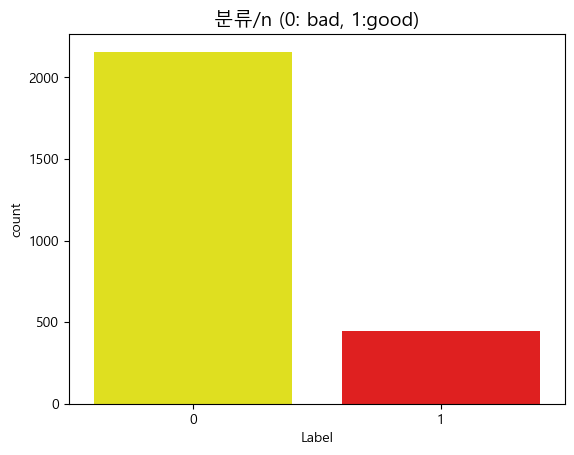

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 불균형 데이터 시각화
import seaborn as sns
colors = ['yellow', 'red']
sns.countplot('Label', data=df, palette=colors)
plt.title('분류/n (0: bad, 1:good)', fontsize=14)

* 3. 언더샘플링

In [6]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Label'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Label'].value_counts()

0    445
1    445
Name: Label, dtype: int64

* 4. 독립변수, 종속변수 재지정

In [7]:
X=df_samp[train_cols]
y=df_samp["Label"]

------------------------------------

* 5. 변수 유효성 확인

In [8]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
#모델의 설명력 62%
#citations 변수는 유의하지 않음 : p-value 0.96

Optimization terminated successfully.
         Current function value: 0.263067
         Iterations 8
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.620      
Dependent Variable:   Label             AIC:               484.2592   
Date:                 2023-04-18 15:16  BIC:               522.5889   
No. Observations:     890               Log-Likelihood:    -234.13    
Df Model:             7                 LL-Null:           -616.90    
Df Residuals:         882               LLR p-value:       5.0478e-161
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0665   0.0155 -4.2972 0.0000 -0.0969 -0.0362
int

In [9]:
#citations 변수를 제거한 모형

cols=['teaching', 'international', 'research', 'income',
'num_students', 'student_staff_ratio', 'international_students']
X=df_samp[cols]
model=sm.Logit(y,X)
result=model.fit()
result.summary2()
#양의 상관관계: international_students 외국인학생수, research 연구능력
#음의 상관관계: student_staff_ratio 교수1인당 담당학생수가 적으면 우수한 학교

Optimization terminated successfully.
         Current function value: 0.263068
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.620      
Dependent Variable:   Label             AIC:               482.2606   
Date:                 2023-04-18 15:17  BIC:               515.7991   
No. Observations:     890               Log-Likelihood:    -234.13    
Df Model:             6                 LL-Null:           -616.90    
Df Residuals:         883               LLR p-value:       4.2846e-162
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       8.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
teaching               -0.0668   0.0139 -4.8183 0.0000 -0.0940 -0.0396
international          -0.0470   0.0081 -5.8316 0.0000 -0.0628 -0.0312
research                0.1928   0.0163 11.8048 0.0000  0.1608  0.2248
income                 -0.0295   0.0059 -5.0230 0.0000 -0.0411 -0.0180
num_students           -0.0000   0.0000 -3.6177 0.0003 -0.0001 -0.0000
student_staff_ratio    -0.1069   0.0169 -6.3162 0.0000 -0.1401 -0.0737
international_students  5.0092   1.7265  2.9015 0.0037  1.6254  8.3930
======================================================================

"""

* 6. 알고리즘 비교 (GridSearchCV 이용)

In [12]:
#다양한 알고리즘별 정확도를 저장할 리스트
scores=[]

In [13]:
# 1) 로지스틱회귀분석
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)),
])
params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 100}
0.9156770406770406


In [14]:
# 1-2) 결과 저장
scores.append(grid.best_score_)

In [15]:
# 2) 의사결정나무
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.7817135317135318


In [16]:
# 2-2) 결과 저장
scores.append(grid.best_score_)

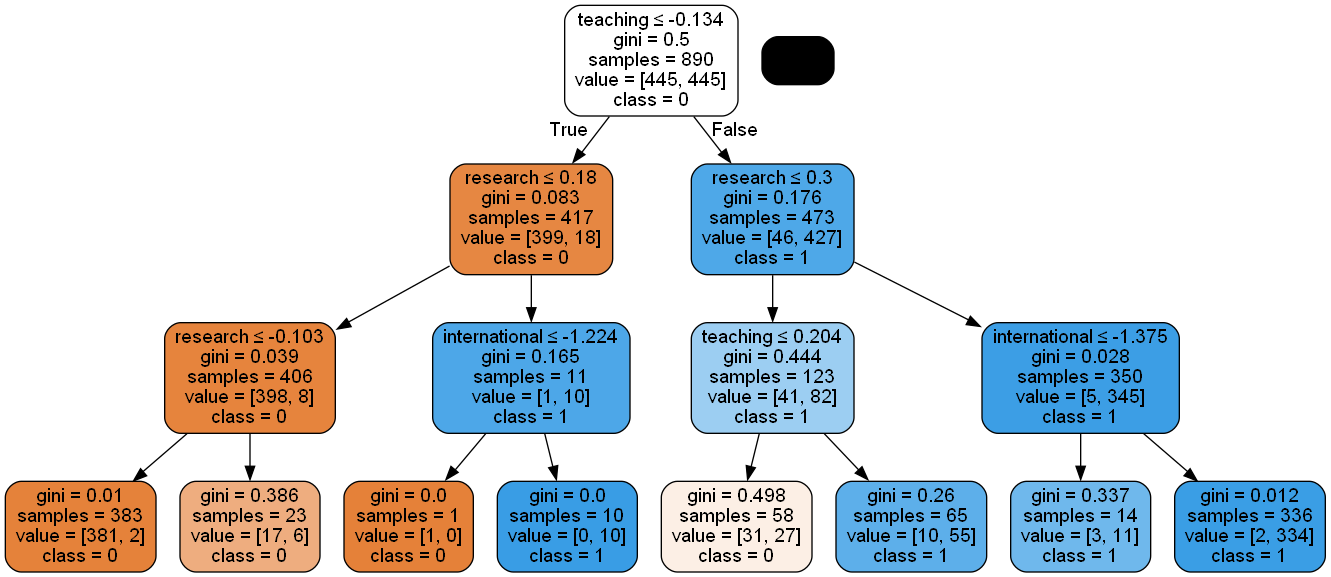

In [19]:
# 2-3) 트리모델 구성 그래프

tree=grid.best_estimator_['clf']

from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None,
        feature_names=cols, class_names=["0","1"], filled=True,
        rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

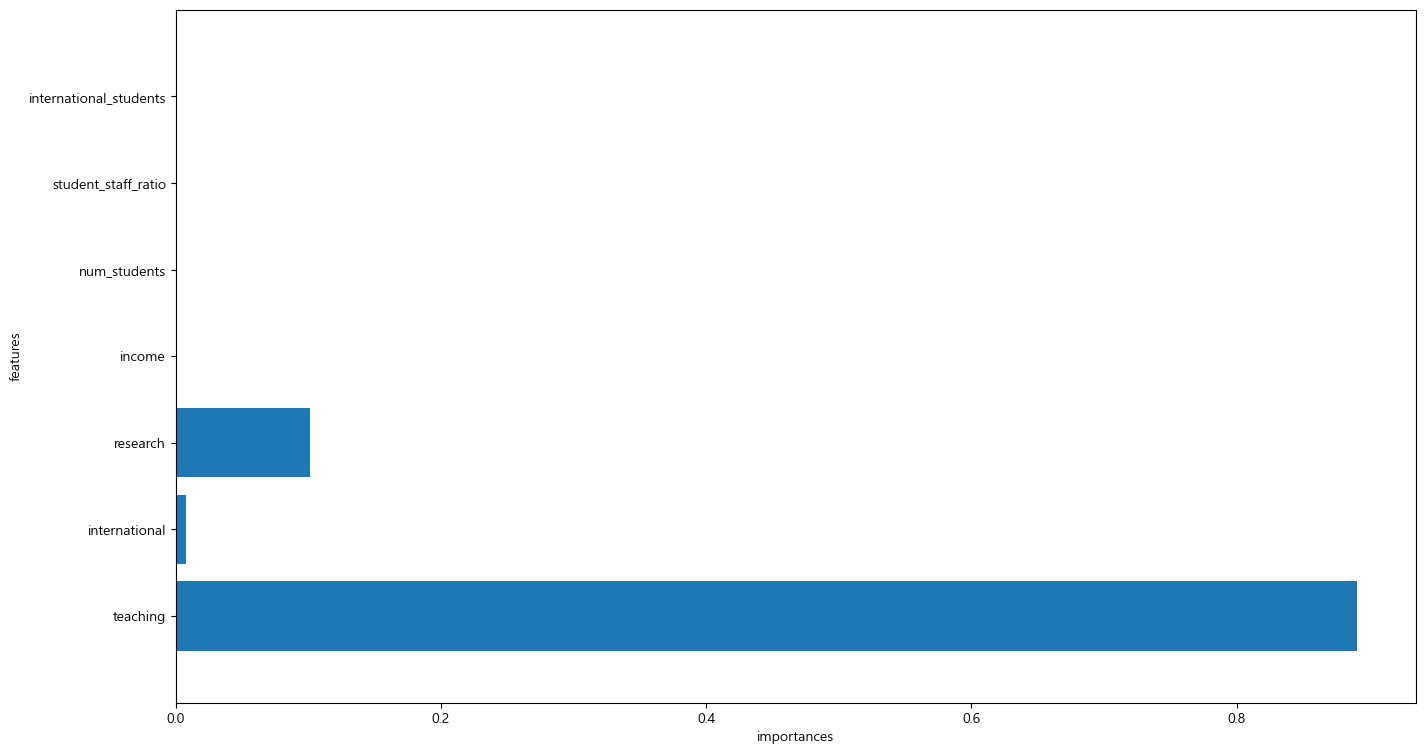

In [20]:
# 2-4) 특성 중요도
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)

import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,
                    align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)
#특성 중요도 : teaching > research

In [21]:
# 3) 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 4, 'clf__n_estimators': 20}
0.7918259168259167


In [22]:
# 3-2) 결과 저장
scores.append(grid.best_score_)

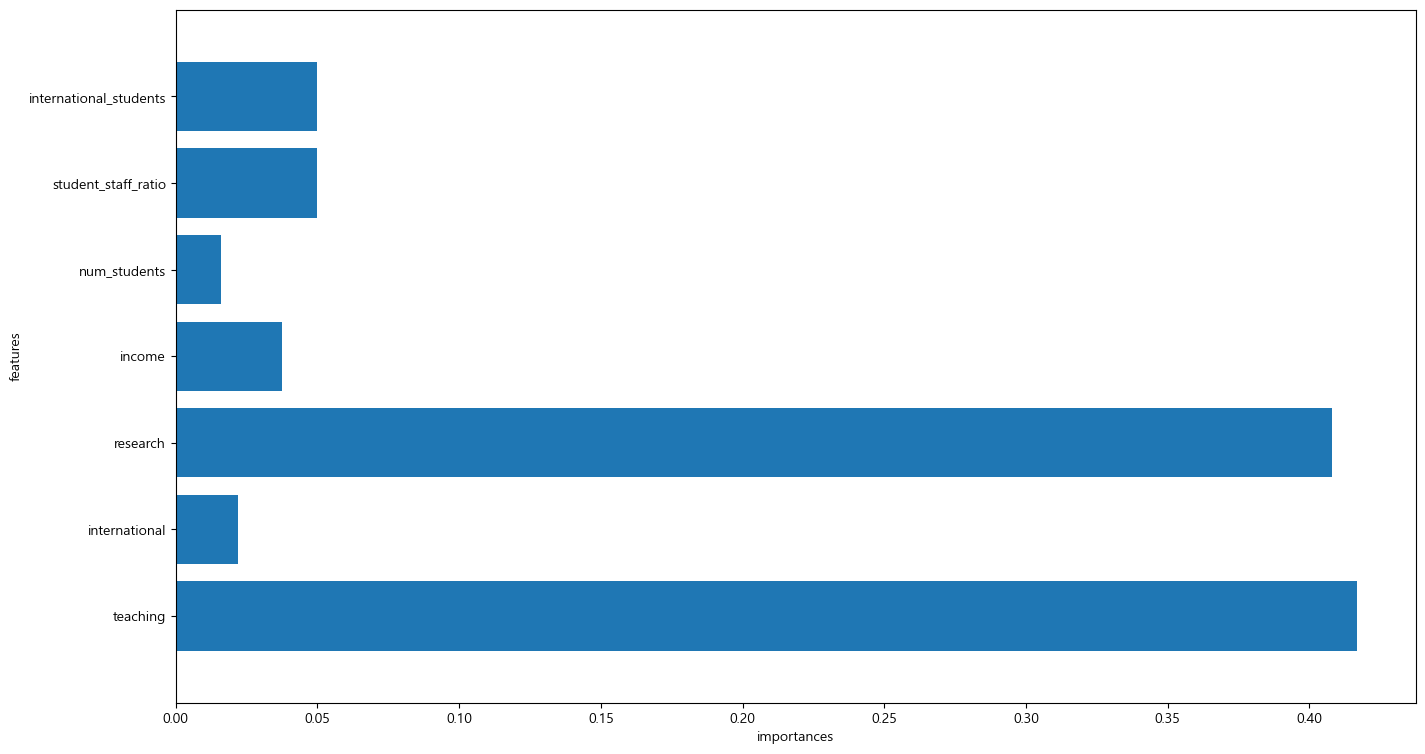

In [23]:
# 3-3) 특성 중요도
rf=grid.best_estimator_['clf']
plot_tree(rf)
# teaching > research

In [24]:
# 4) knn
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])
params = {
    'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

{'clf__n_neighbors': 9}
0.8280401613734947


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

In [25]:
# 4-2) 결과 저장
scores.append(grid.best_score_)

In [26]:
# 5) 인공신경망
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
    'clf__hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'clf__activation': ['tanh', 'relu'],
    'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__activation': 'tanh', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,)}
0.9100539933873266


In [27]:
# 5-2) 결과 저장
scores.append(grid.best_score_)

In [28]:
# 6) svm
from sklearn.svm import SVC

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=0)),
])
params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 1000, 'clf__gamma': 0.0001}
0.9111725361725362


In [29]:
# 6-2) 결과 저장
scores.append(grid.best_score_)

In [30]:
# 7) keras
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers

def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu",
    input_shape=(X.shape[1],)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss='binary_crossentropy',
                    optimizer=optimizer, # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표
    return network

neural_network = KerasClassifier(model=create_network, verbose=0)
# 하이퍼파라미터 탐색 영역을 정의
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',neural_network)
])
params={
    'clf__epochs': [50, 100],
    'clf__batch_size': [32,64,128],
    'clf__optimizer': ["rmsprop", "adam"],
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__batch_size': 64, 'clf__epochs': 50, 'clf__optimizer': 'adam'}
0.8999264415931082


In [31]:
# 7-2) 결과 저장
scores.append(grid.best_score_)

* 7. 알고리즘별 예측도 그래프

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.91567704 0.78171353 0.79182592 0.82804016 0.91005399 0.91117254
 0.89992644]
최적의 모형: LOGIT
최고 정확도: 0.9156770406770406


Text(0, 0.5, 'Accuracy')

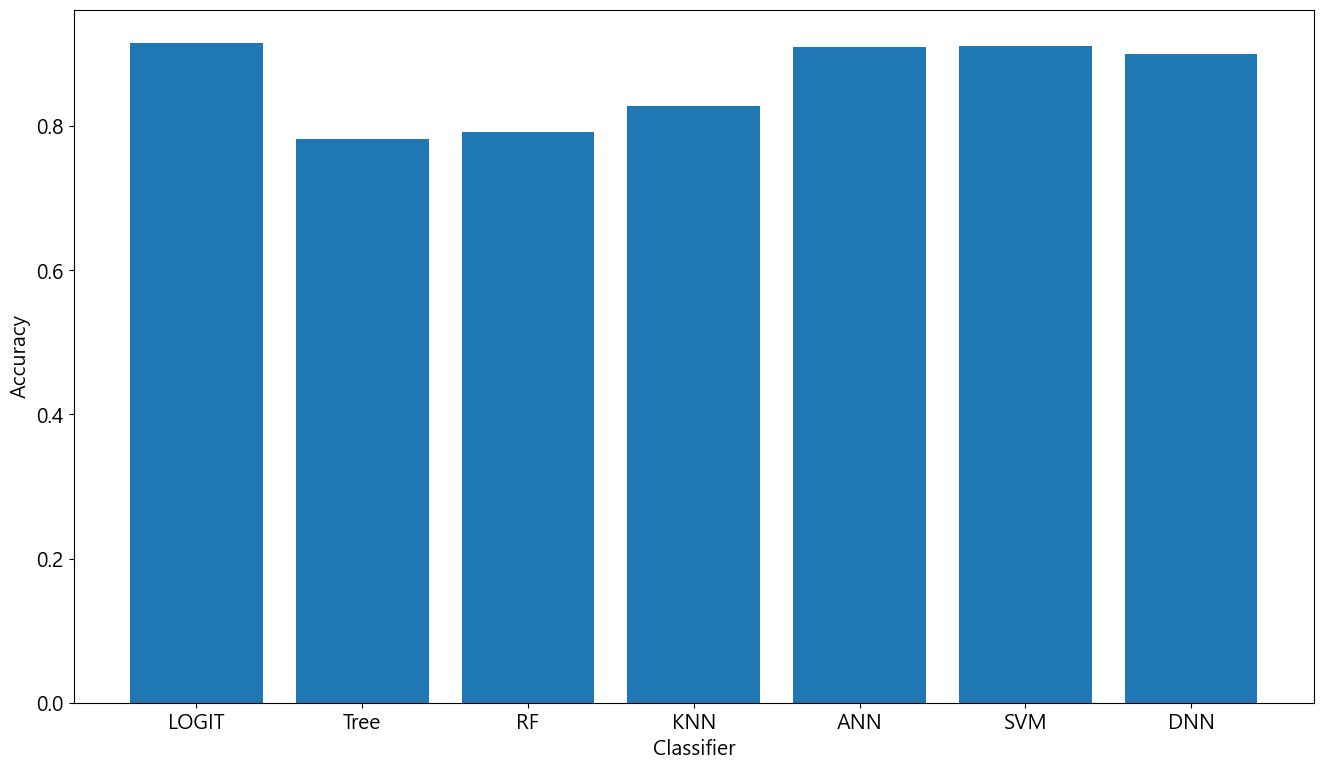

In [32]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN"]

scores_arr=np.array(scores) #검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) #가장 좋은 정확도
idx=np.argmax(scores_arr) #최대값의 인덱스
print(methods)
print(scores_arr)
print("최적의 모형:",methods[idx])
print("최고 정확도:",max_rate)

plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")